In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report)

In [2]:
# Cargar dataset
df = pd.read_csv('train.csv')

print("Dataset cargado")
print("Forma:", df.shape)
print("\nPrimeras filas:")
print(df.head())

Dataset cargado
Forma: (891, 12)

Primeras filas:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4    

In [3]:
# Seleccionar features
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X = df[features].copy()
y = df["Survived"]

print("Features seleccionados:", features)
print("Forma X:", X.shape)
print("\nValores nulos:")
print(X.isnull().sum())

Features seleccionados: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
Forma X: (891, 7)

Valores nulos:
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [4]:
# Imputar Age por grupos (Pclass, Sex)
print("Imputando Age por grupos")
age_medians = X.groupby(["Sex", "Pclass"])["Age"].median()

def fill_age(row):
    if pd.isnull(row["Age"]):
        return age_medians.loc[row["Sex"], row["Pclass"]]
    return row["Age"]

X["Age"] = X.apply(fill_age, axis=1)
print("Age imputado con mediana")

Imputando Age por grupos
Age imputado con mediana


In [5]:
# Imputar Fare por Pclass
print("Imputando Fare por Pclass")
fare_medians = X.groupby(["Pclass"])["Fare"].median()

def fill_fare(row):
    if pd.isnull(row["Fare"]):
        return fare_medians.loc[row["Pclass"]]
    return row["Fare"]

X["Fare"] = X.apply(fill_fare, axis=1)
print("Fare imputado cor Pclass")

Imputando Fare por Pclass
Fare imputado cor Pclass


In [6]:
# Imputar Embarked con moda
print("Imputando Embarked")
embarked_mode = X["Embarked"].mode()[0]
X["Embarked"] = X["Embarked"].fillna(embarked_mode)
print("Embarked imputado con moda:", embarked_mode)

Imputando Embarked
Embarked imputado con moda: S


In [7]:
# Label Encoding para Sex
sex_map = {"male": 0, "female": 1}
X["Sex"] = X["Sex"].map(sex_map).astype(int)
print("Sex codificado (male=0, female=1)")

Sex codificado (male=0, female=1)


In [8]:
# One-Hot Encoding para Embarked
print("One-Hot Encoding para Embarked")
X = pd.get_dummies(X, columns=["Embarked"], drop_first=True)
print("Embarked codificado")
print("Columnas finales:", list(X.columns))

One-Hot Encoding para Embarked
Embarked codificado
Columnas finales: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']


In [9]:
# Normalizar Age y Fare
print("Normalizando Age y Fare con RobustScaler")
scaler = RobustScaler()
X[["Age", "Fare"]] = scaler.fit_transform(X[["Age", "Fare"]])
print("Estadísticas después de normalizar:")
print(X[["Age", "Fare"]].describe())

Normalizando Age y Fare con RobustScaler
Estadísticas después de normalizar:
              Age        Fare
count  891.000000  891.000000
mean     0.214650    0.768745
std      0.917546    2.152200
min     -1.764138   -0.626005
25%     -0.310345   -0.283409
50%      0.000000    0.000000
75%      0.689655    0.716591
max      3.724138   21.562738


In [11]:
# Separar datos 80/20
print("Entrenamiento y validación")
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Entrenamiento:", X_train.shape)
print("Validación:", X_valid.shape)

Entrenamiento y validación
Entrenamiento: (712, 8)
Validación: (179, 8)


In [13]:
# Crear y entrenar modelo
print("Entrenando Decision Trees")
model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

model.fit(X_train, y_train)

Entrenando Decision Trees


DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=20,
                       random_state=42)

In [14]:
# Predicciones
y_pred = model.predict(X_valid)

# Métricas
precision = precision_score(y_valid, y_pred)
accuracy = accuracy_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)

print("MÉTRICAS DEL MODELO:")
print("Precision:", round(precision, 4))
print("Accuracy: ", round(accuracy, 4))
print("Recall:   ", round(recall, 4))
print("F1-score: ", round(f1, 4))

# Reporte completo
print("\n" + classification_report(y_valid, y_pred, target_names=['No Sobrevivió', 'Sobrevivió']))

MÉTRICAS DEL MODELO:
Precision: 0.8
Accuracy:  0.8045
Recall:    0.7027
F1-score:  0.7482

               precision    recall  f1-score   support

No Sobrevivió       0.81      0.88      0.84       105
   Sobrevivió       0.80      0.70      0.75        74

     accuracy                           0.80       179
    macro avg       0.80      0.79      0.79       179
 weighted avg       0.80      0.80      0.80       179



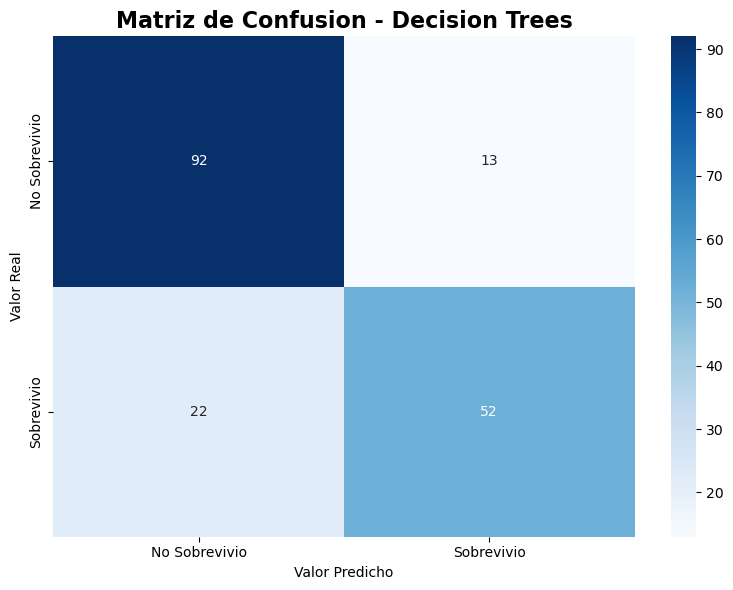

In [15]:
cm = confusion_matrix(y_valid, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=['No Sobrevivio', 'Sobrevivio'], yticklabels=['No Sobrevivio', 'Sobrevivio'])
plt.title('Matriz de Confusion - Decision Trees', fontsize=16, fontweight='bold')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.tight_layout()
plt.savefig('matriz_confusion_decision_trees.png', dpi=300, bbox_inches='tight')
plt.show()

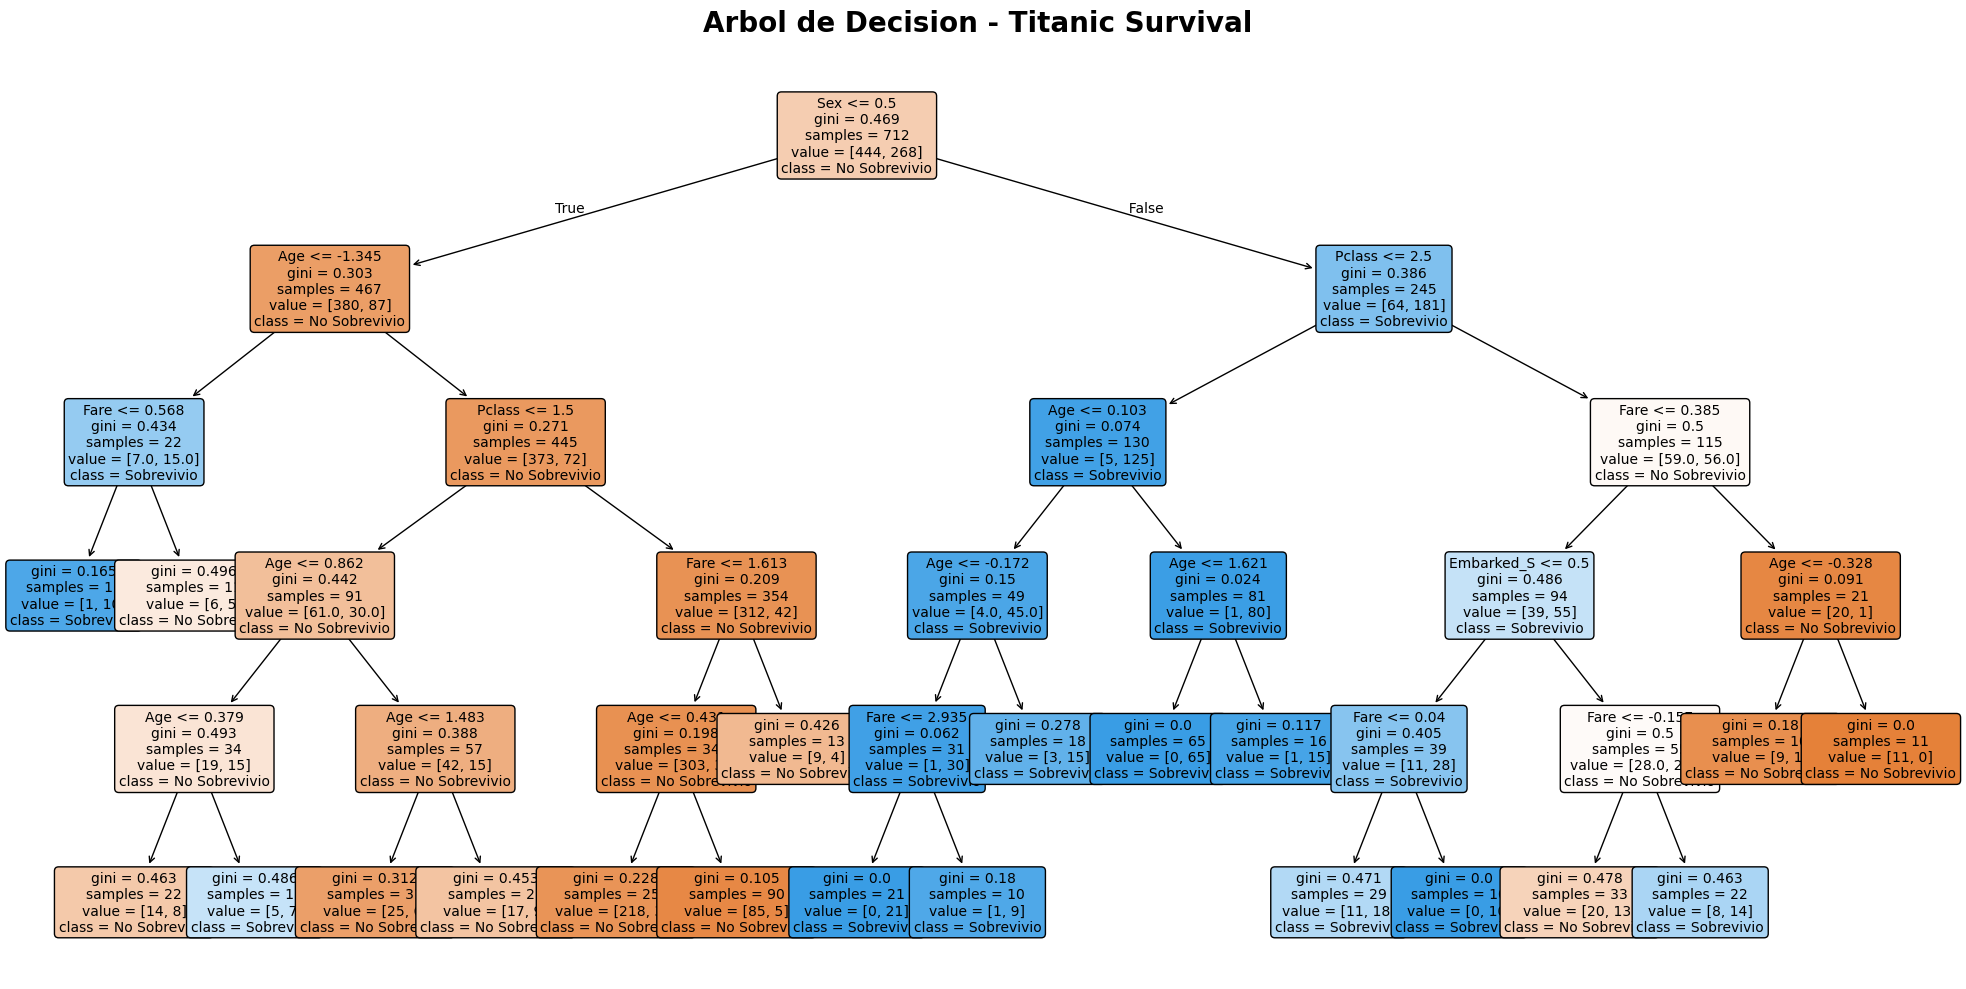

In [16]:
# Visualizar el arbol de decision
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns,class_names=['No Sobrevivio', 'Sobrevivio'],filled=True,rounded=True,fontsize=10)
plt.title('Arbol de Decision - Titanic Survival', fontsize=20, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('arbol_decision_trees.png', dpi=300, bbox_inches='tight')
plt.show()

IMPORTANCIA DE CARACTERISTICAS:
      Feature  Importance
1         Sex    0.586938
0      Pclass    0.203033
5        Fare    0.101604
2         Age    0.094349
7  Embarked_S    0.014075
3       SibSp    0.000000
4       Parch    0.000000
6  Embarked_Q    0.000000


C:\Users\e_gar\AppData\Local\Temp\ipykernel_34172\4247180663.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')


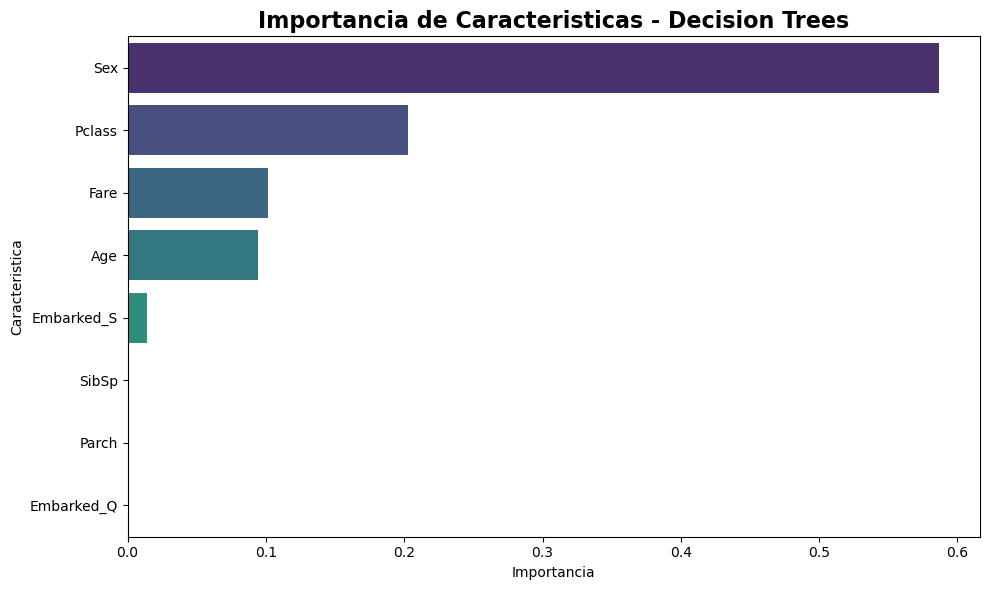

In [17]:
# Importancia de caracteristicas
feature_importance = pd.DataFrame({'Feature': X.columns,'Importance': model.feature_importances_}).sort_values('Importance', ascending=False)

print("IMPORTANCIA DE CARACTERISTICAS:")
print(feature_importance)

# Visualizar importancia
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title('Importancia de Caracteristicas - Decision Trees', fontsize=16, fontweight='bold')
plt.xlabel('Importancia')
plt.ylabel('Caracteristica')
plt.tight_layout()
plt.savefig('importancia_caracteristicas_decision_trees.png', dpi=300, bbox_inches='tight')
plt.show()